# Compare prediction

In [24]:
import sys
sys.path.insert(0,"/home/gridsan/hwpang/Software/RMG-Py/")
sys.path.insert(0,"..")

import json
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import string
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

from tree.parameters import Ts

In [25]:
hbi_unc_df = pd.read_csv("../data/hbi_unc.csv")

with open("../data/splits/random.json", "r") as f:
    train_inds, test_inds = json.load(f)

num_training = len(train_inds)

test_df = hbi_unc_df.loc[test_inds, :]
test_df = test_df.reset_index(drop=True)

# Load test results

In [33]:
sidt_df_dict = {}
fractions = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
run_dirs = [
    "split-random_run-basecase",
    "split-random_run-basecase-upper_bound",
    "split-random_run-aleatoric_prepruning-upper_bound",
]
for run_dir in run_dirs:
    for frac in fractions:
        sidt_df = pd.read_csv(f"../models/{run_dir}/frac-{frac}/test.csv")
        sidt_df_dict[run_dir, frac] = sidt_df

# Plot: RMSE/MAE vs. training fraction

In [56]:
temp_dict = {
    "fraction of training": [],
    "run_dir": []
}

for column in test_df.columns:
    if column.startswith("HBI_"):
        temp_dict["rmse_"+column] = []
        temp_dict["mae_"+column] = []

for (run_dir, frac), sidt_df in sidt_df_dict.items():
    temp_dict["fraction of training"].append(frac)
    temp_dict["run_dir"].append(run_dir)
    for column in test_df.columns:
        if column.startswith("HBI_"):
            true_ys = test_df[column]
            pred_ys = sidt_df[column]
            temp_dict["rmse_"+column].append(np.sqrt(mean_squared_error(true_ys, pred_ys)))
            temp_dict["mae_"+column].append(mean_absolute_error(true_ys, pred_ys))

error_df = pd.DataFrame(temp_dict)
# error_df

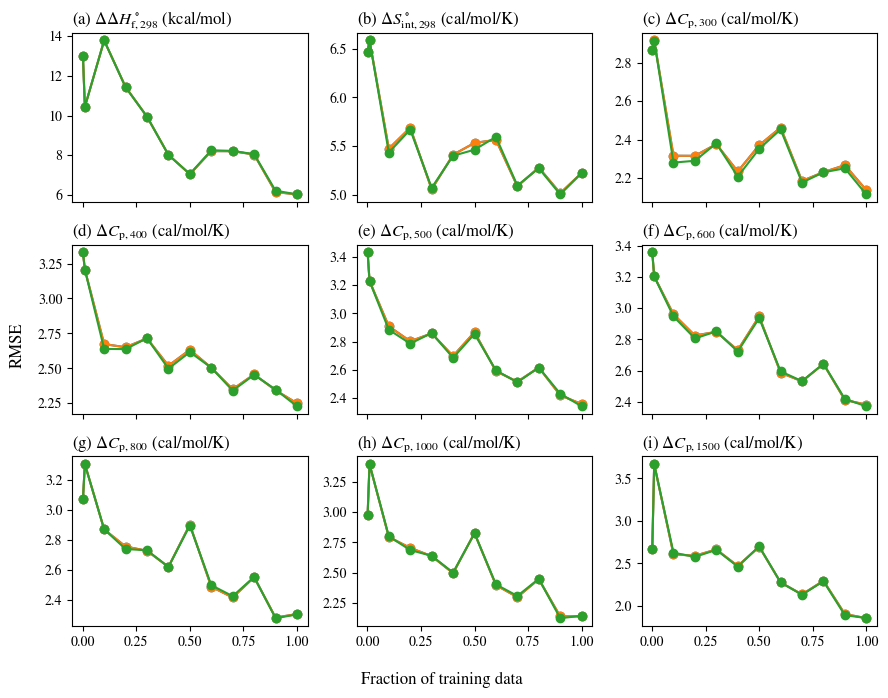

In [57]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(9, 7))
bins = 20

for run_dir in run_dirs:
    ax = axs.flat[0]
    label = "rmse_HBI_H298 (kcal/mol)"
    ax.plot(error_df.loc[error_df["run_dir"]==run_dir, "fraction of training"], error_df.loc[error_df["run_dir"]==run_dir, label], "-o")
    ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

    ax = axs.flat[1]
    label = "rmse_HBI_Sint298 (cal/mol/K)"
    ax.plot(error_df.loc[error_df["run_dir"]==run_dir, "fraction of training"], error_df.loc[error_df["run_dir"]==run_dir, label], "-o")
    ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

    for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
        label = f"rmse_HBI_Cp{T} (cal/mol/K)"
        ax.plot(error_df.loc[error_df["run_dir"]==run_dir, "fraction of training"], error_df.loc[error_df["run_dir"]==run_dir, label], "-o", label=run_dir)
        ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

# axs.flat[-1].legend()
fig.supylabel(f"RMSE")
fig.supxlabel(f"Fraction of training data")

fig.tight_layout()
# fig.savefig("../figures/bounded_uncertainty_frac_vs_training_frac.pdf", bbox_inches="tight")

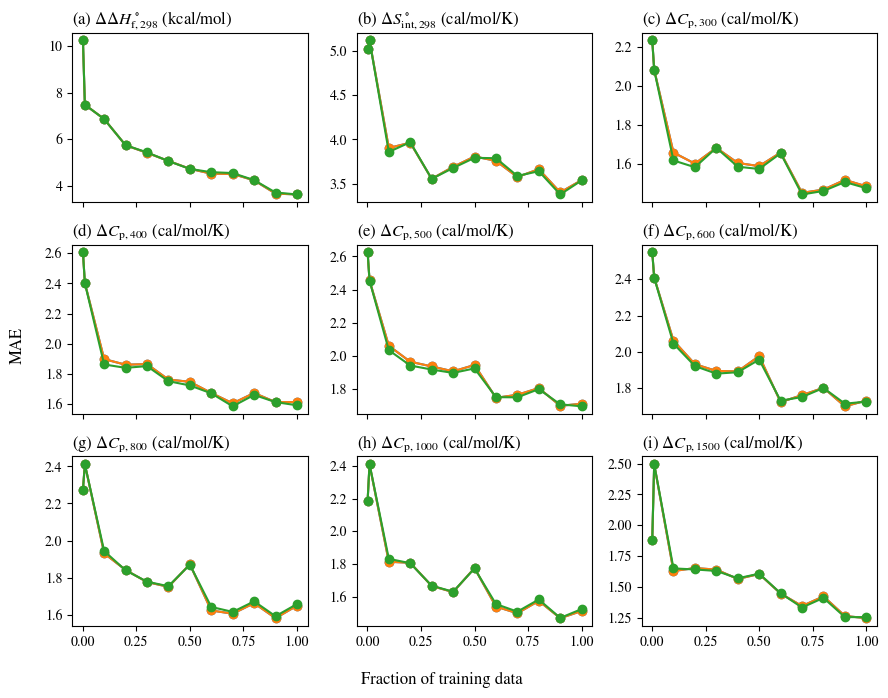

In [58]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(9, 7))
bins = 20

for run_dir in run_dirs:
    ax = axs.flat[0]
    label = "mae_HBI_H298 (kcal/mol)"
    ax.plot(error_df.loc[error_df["run_dir"]==run_dir, "fraction of training"], error_df.loc[error_df["run_dir"]==run_dir, label], "-o")
    ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

    ax = axs.flat[1]
    label = "mae_HBI_Sint298 (cal/mol/K)"
    ax.plot(error_df.loc[error_df["run_dir"]==run_dir, "fraction of training"], error_df.loc[error_df["run_dir"]==run_dir, label], "-o")
    ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

    for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
        label = f"mae_HBI_Cp{T} (cal/mol/K)"
        ax.plot(error_df.loc[error_df["run_dir"]==run_dir, "fraction of training"], error_df.loc[error_df["run_dir"]==run_dir, label], "-o", label=run_dir)
        ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

# axs.flat[-1].legend()
fig.supylabel(f"MAE")
fig.supxlabel(f"Fraction of training data")

fig.tight_layout()
# fig.savefig("../figures/bounded_uncertainty_frac_vs_training_frac.pdf", bbox_inches="tight")

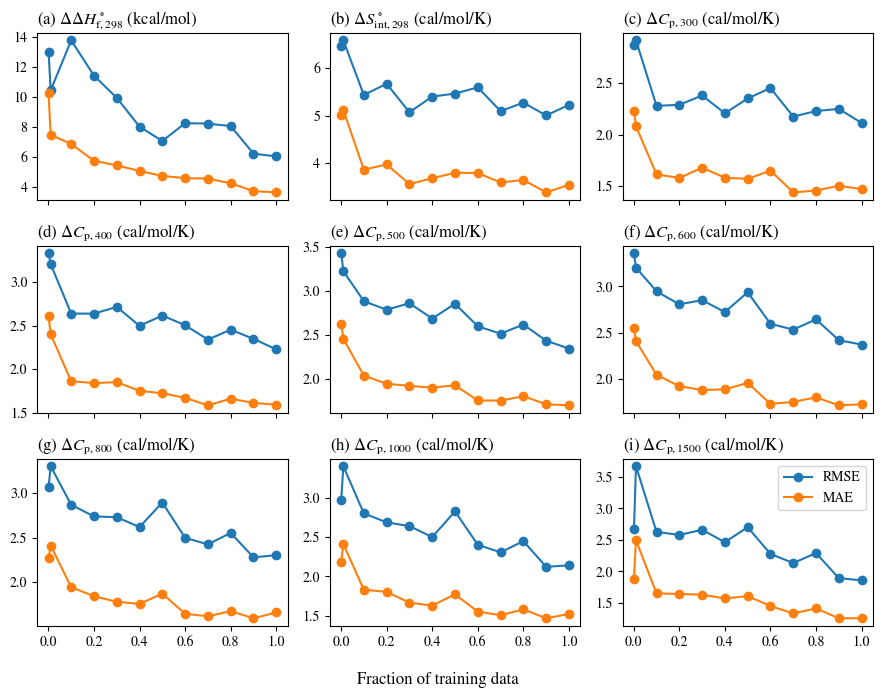

In [61]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(9, 7))
bins = 20

run_dir = run_dirs[2]

ax = axs.flat[0]
label = "HBI_H298 (kcal/mol)"
ax.plot(error_df.loc[error_df["run_dir"]==run_dir, "fraction of training"], error_df.loc[error_df["run_dir"]==run_dir, "rmse_"+label], "-o")
ax.plot(error_df.loc[error_df["run_dir"]==run_dir, "fraction of training"], error_df.loc[error_df["run_dir"]==run_dir, "mae_"+label], "-o")
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
label = "HBI_Sint298 (cal/mol/K)"
ax.plot(error_df.loc[error_df["run_dir"]==run_dir, "fraction of training"], error_df.loc[error_df["run_dir"]==run_dir, "rmse_"+label], "-o")
ax.plot(error_df.loc[error_df["run_dir"]==run_dir, "fraction of training"], error_df.loc[error_df["run_dir"]==run_dir, "mae_"+label], "-o")
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    label = f"HBI_Cp{T} (cal/mol/K)"
    ax.plot(error_df.loc[error_df["run_dir"]==run_dir, "fraction of training"], error_df.loc[error_df["run_dir"]==run_dir, "rmse_"+label], "-o", label="RMSE")
    ax.plot(error_df.loc[error_df["run_dir"]==run_dir, "fraction of training"], error_df.loc[error_df["run_dir"]==run_dir, "mae_"+label], "-o", label="MAE")
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

axs.flat[-1].legend()
fig.supxlabel(f"Fraction of training data")

fig.tight_layout()
# fig.savefig("../figures/bounded_uncertainty_frac_vs_training_frac.pdf", bbox_inches="tight")

# Plot: bounded uncertainty

In [64]:
temp_dict = {
    "fraction of training": [],
    "run_dir": []
}

for column in test_df.columns:
    if column.startswith("HBI_"):
        temp_dict[column] = []

for (run_dir, frac), sidt_df in sidt_df_dict.items():
    temp_dict["fraction of training"].append(frac)
    temp_dict["run_dir"].append(run_dir)
    for column in test_df.columns:
        if column.startswith("HBI_"):
            pred_unc = sidt_df["unc_"+column]
            true_err = (sidt_df[column] - test_df[column]).abs()
            data_unc = test_df["unc_"+column]
            temp_dict[column].append(sum((pred_unc >= true_err)) / len(pred_unc))

bounded_df = pd.DataFrame(temp_dict)
# bounded_df

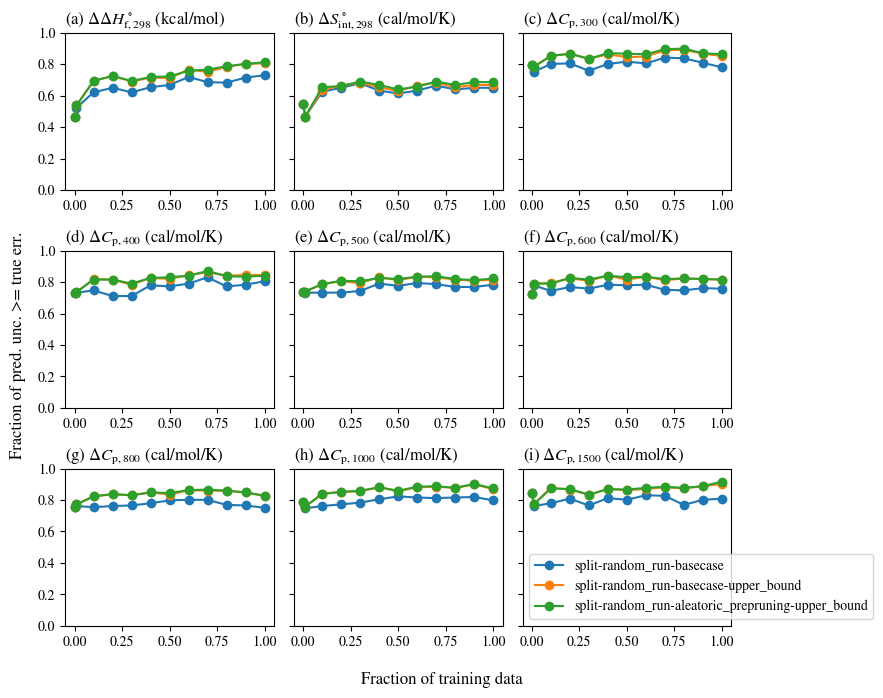

In [65]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9, 7))
bins = 20

for run_dir in run_dirs:
    ax = axs.flat[0]
    label = "HBI_H298 (kcal/mol)"
    ax.plot(bounded_df.loc[bounded_df["run_dir"]==run_dir, "fraction of training"], bounded_df.loc[bounded_df["run_dir"]==run_dir, label], "-o")
    ax.set_ylim([0, 1])
    ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

    ax = axs.flat[1]
    label = "HBI_Sint298 (cal/mol/K)"
    ax.plot(bounded_df.loc[bounded_df["run_dir"]==run_dir, "fraction of training"], bounded_df.loc[bounded_df["run_dir"]==run_dir, label], "-o")
    ax.set_ylim([0, 1])
    ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

    for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
        label = f"HBI_Cp{T} (cal/mol/K)"
        ax.plot(bounded_df.loc[bounded_df["run_dir"]==run_dir, "fraction of training"], bounded_df.loc[bounded_df["run_dir"]==run_dir, label], "-o", label=run_dir)
        ax.set_ylim([0, 1])
        ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

axs.flat[-1].legend()
fig.supylabel(f"Fraction of pred. unc. >= true err.")
fig.supxlabel(f"Fraction of training data")

fig.tight_layout()
fig.savefig("../figures/bounded_uncertainty_frac_vs_training_frac.pdf", bbox_inches="tight")